### Customer Lifetime Value prediction

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Intelegerea problemei:
## Scopul aceste analize in esenta sa aflam cine sunt clinetii valorosi. Dupa ce aflam asta putem sa ne realocam bugetul de marketing pentru a da target segmentului cel mai profitabil. In modul asta pastram acelasi buget de marketing fara a suprainvestii in clienti cu un ROI mic pe durata lunga de timp.

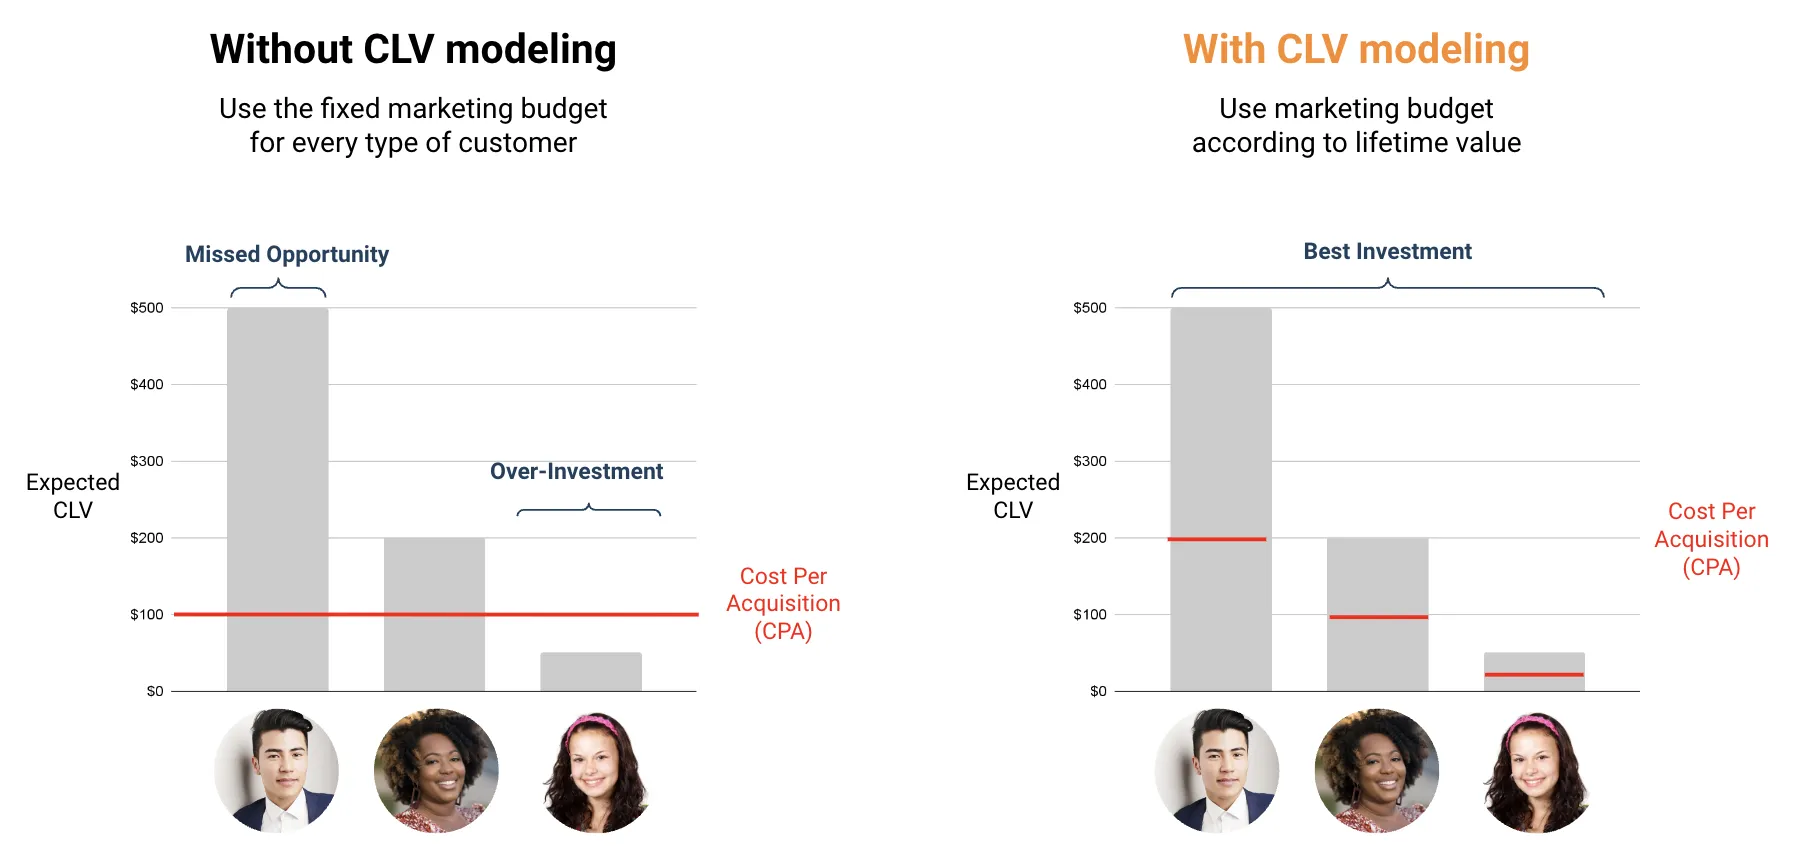

In [645]:
df = pd.read_csv(filepath_or_buffer="./data/customer_segmentation.csv", encoding="cp1252") # Specify the encoding!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [646]:
df.head(2000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1995,536551,22837,HOT WATER BOTTLE BABUSHKA,2,12/1/2010 14:34,4.65,17346.0,United Kingdom
1996,536551,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 14:34,2.95,17346.0,United Kingdom
1997,536551,22174,PHOTO CUBE,3,12/1/2010 14:34,1.65,17346.0,United Kingdom
1998,536551,22112,CHOCOLATE HOT WATER BOTTLE,1,12/1/2010 14:34,4.95,17346.0,United Kingdom


In [647]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
viz_df = df.groupby('InvoiceDate', as_index=False).agg({'Revenue': 'sum', 'CustomerID': 'nunique'})
viz_df.columns = ['InvoiceDate', 'TotalRevenue', 'CustomerCount']
viz_df['InvoiceDate'] = pd.to_datetime(viz_df['InvoiceDate'])

<Axes: xlabel='InvoiceDate'>

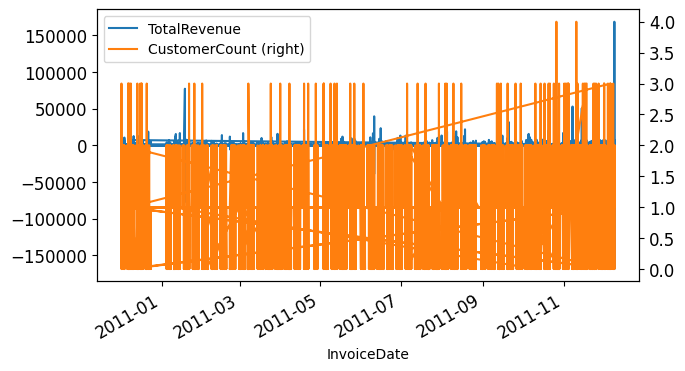

In [648]:
viz_df.set_index('InvoiceDate', inplace=True)
viz_df.plot(kind='line', figsize=(7, 4),fontsize=12, secondary_y='CustomerCount')

## Valorile negative mari pentru TotalRevenue sugereaza retururi. Nu se poate vedea nicio tendinta descendenta sau acendenta in date.

## Prelucrarea datelor

In [649]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df['CustomerID'] = df['CustomerID'].astype(int)

In [650]:
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Revenue'] = df['UnitPrice'] * df['Quantity'] # This should be predicted!

In [651]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,201012


In [652]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue,InvoiceYearMonth
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749,201101.038417
std,180.420210,22.096788,1713.169877,309.055588,23.836517
min,1.000000,0.000000,12346.000000,0.000000,201012.000000
25%,2.000000,1.250000,13969.000000,4.680000,201104.000000
50%,6.000000,1.950000,15159.000000,11.800000,201107.000000
75%,12.000000,3.750000,16795.000000,19.800000,201110.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,201112.000000


In [653]:
viz_df = df.groupby('InvoiceDate', as_index=False).agg({'Revenue': 'sum', 'CustomerID': 'nunique'})
viz_df.columns = ['InvoiceDate', 'TotalRevenue', 'CustomerCount']
viz_df['InvoiceDate'] = pd.to_datetime(viz_df['InvoiceDate'])

Vedem veniturile pe baza datii.

In [654]:
viz_df[['InvoiceDate']].describe()
viz_df.head(10)

,InvoiceDate,TotalRevenue,CustomerCount
0,2010-12-01,46376.49,95
1,2010-12-02,47316.53,99
2,2010-12-03,23921.71,50
3,2010-12-05,31771.60,75
4,2010-12-06,31215.64,82
5,2010-12-07,53795.31,65
6,2010-12-08,39248.82,99
7,2010-12-09,38231.90,90
8,2010-12-10,33650.28,53
9,2010-12-12,17305.77,42


<Axes: xlabel='InvoiceDate', ylabel='CustomerCount'>

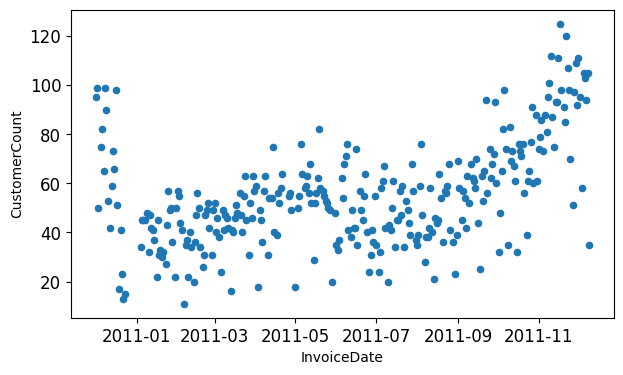

In [655]:
viz_df.plot(kind='scatter', figsize=(7, 4), fontsize=12, x='InvoiceDate', y='CustomerCount')

<Axes: xlabel='InvoiceDate'>

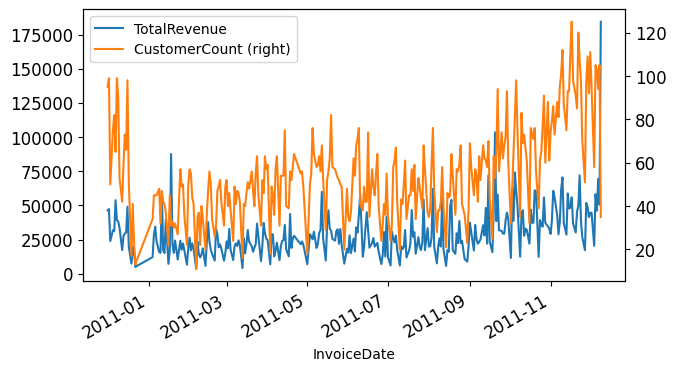

In [656]:
viz_df.set_index('InvoiceDate', inplace=True)
viz_df.plot(kind='line', figsize=(7, 4), fontsize=12, secondary_y='CustomerCount')

## Putem observa o crestere in clienti si in venituri.

## O metoda comuna de a calcula CLTV este prin Monthly Avg. Churn Rate si Lifetime month per User. Este o metoda buna pentru prezice return on investment (ROI) si customer acquisition cost (CAC).

### Monthly Avg. Churn Rate = 1 — (# customers this month / # customers last month)

### Lifetime month per User = 1/ Avg. Monthly Churn Rate

### CLV = Monthly Avg. Revenue Per User(ARPU) * Lifetime month per User

In [657]:

date_rng = pd.date_range(start='2010-11-30', end='2011-11-30', freq='M')
churn =  {"Month":[],"ChurnRate":[], "AvgRevenue":[]}

# Prima luna fata rate de parasire
this_period  =df[(df['InvoiceDate']> date_rng[0].date()) & (df['InvoiceDate']<= date_rng[1].date()) ]['CustomerID'].unique()
total_revenue =df[(df['InvoiceDate']> date_rng[0].date()) & (df['InvoiceDate']<= date_rng[1].date()) ]['Revenue'].sum()

churn["Month"].append(date_rng[1])
churn["ChurnRate"].append(np.nan)
churn["AvgRevenue"].append(int(total_revenue/len(this_period)))

#loop through the rest of the months
for i in range(len(date_rng)):
    try:
        last_period =df[(df['InvoiceDate']> date_rng[i].date()) & (df['InvoiceDate']<= date_rng[i+1].date()) ]['CustomerID'].unique()
        this_period  =df[(df['InvoiceDate']> date_rng[i+1].date()) & (df['InvoiceDate']<= date_rng[i+2].date()) ]['CustomerID'].unique()
        total_revenue =df[(df['InvoiceDate']> date_rng[i+1].date()) & (df['InvoiceDate']<= date_rng[i+2].date()) ]['Revenue'].sum()
        retained = np.intersect1d(last_period, this_period)
        churn["Month"].append(date_rng[i+2])
        churn["ChurnRate"].append((int((1-(len(retained)/len(last_period)))*100)))
        churn["AvgRevenue"].append(int(total_revenue/len(this_period)))
    except:
        pass

# Create churn_df DataFrame
churn_df = pd.DataFrame(churn)
churn_df

/var/folders/8g/zd5qp7s54t9fhplwtnqs76nm0000gn/T/ipykernel_49702/2561437453.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Month,ChurnRate,AvgRevenue
0,2010-12-31,NaN,647
1,2011-01-31,63.0,768
2,2011-02-28,64.0,589
3,2011-03-31,61.0,611
4,2011-04-30,68.0,548
5,2011-05-31,57.0,642
6,2011-06-30,61.0,667
7,2011-07-31,63.0,632
8,2011-08-31,59.0,690
9,2011-09-30,54.0,752


In [658]:
churn_df.mean().round(0)

Month         2011-06-15 12:00:00
ChurnRate               60.454545
AvgRevenue                  667.0
dtype: object

Durata unui client este de 1.66 luni in urma calculului si castiguri de $667

In [659]:
CLTV = churn_df['AvgRevenue'].mean() * 100 / churn_df['ChurnRate'].mean().round(0)
f"CLTV este de {CLTV.round(0)}"

'CLTV este de 1112.0'

### Limitarile metodei sunt urmatoarele:
1. Nu toti clientii sunt la fel.
2. Data primei cumparari variaza.
3. Nu se stie exact cand un client paraseste relatia cu afacerea.

# KMeans

In [660]:
from __future__ import division
from datetime import datetime, timedelta,date

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [661]:
df = pd.read_csv(filepath_or_buffer="./data/customer_segmentation.csv", encoding="cp1252") # Specify the encoding!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [662]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Revenue'] = df['UnitPrice'] * df['Quantity'] # This should be predicted!
revenue = df.groupby(['InvoiceDate'])['Revenue'].sum().reset_index()
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0] # Scot produsele returnate
df['CustomerID'] = df['CustomerID'].astype(int)

# extrag data ultimei achizitii pentru fiecare client
max_purchase = df.groupby('CustomerID').InvoiceDate.max().reset_index()
max_purchase.columns = ['CustomerID','MaxPurchaseDate']
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days 

user_r = max_purchase
user_r.drop('MaxPurchaseDate',axis=1, inplace=True)
user_r.head()

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [663]:
# frecventa de cumparare
tx_frequency = df.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

user_f = tx_frequency

# valoarea totala a cumparaturilor
tx_revenue = df.groupby('CustomerID').Revenue.sum().reset_index()
tx_revenue.columns = ['CustomerID','Revenue']


user = pd.merge(user_r, user_f, on='CustomerID')
user = pd.merge(user, tx_revenue, on='CustomerID')
user.head()

,CustomerID,Recency,Frequency,Revenue
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40


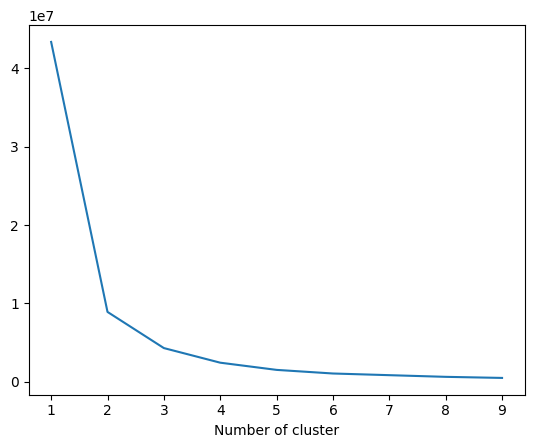

In [664]:
sse={} # error
tx_recency = user[['Recency']].copy()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [665]:
kmeans = KMeans(n_clusters=4)
user['RecencyCluster'] = kmeans.fit_predict(user[['Recency']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

# ordonare recenta de la cea mai veche la cea mai recenta
user = order_cluster('RecencyCluster', 'Recency', user, False)
user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,497.0,307.983903,39.001289,251.0,274.0,304.0,336.0,373.0
1,598.0,192.503344,31.574683,139.0,165.0,190.0,217.0,250.0
2,995.0,84.606030,23.951358,53.0,64.0,78.0,103.0,138.0
3,2249.0,19.888839,14.845261,0.0,7.0,17.0,30.0,52.0


In [666]:
def cluster_plot(user, target_field_name, cluster_field_name):
  # Scatter Plot
  plt.figure(figsize=(8, 6))
  plt.scatter(user.index, user[target_field_name], c=user[cluster_field_name], cmap='viridis')
  plt.title('Scatter Plot of Recency Clusters')
  plt.xlabel('Index')
  plt.ylabel(target_field_name)
  plt.colorbar(label='Cluster')
  plt.show()

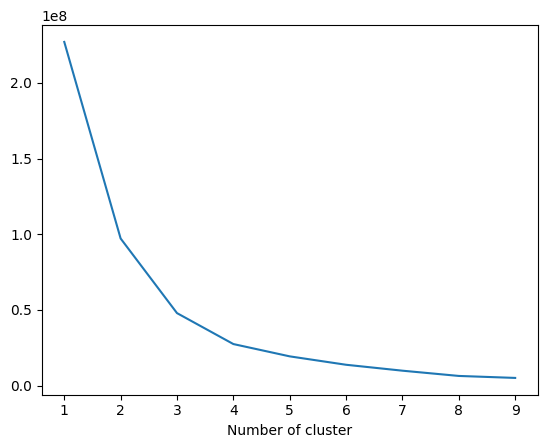

In [667]:
sse={} # error
tx_recency = user_f[['Frequency']].copy()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [668]:
kmeans=KMeans(n_clusters=4)
user['FrequencyCluster']=kmeans.fit_predict(user[['Frequency']])

# ordonare frecventa de la cea mai mica la cea mai mare
user = order_cluster('FrequencyCluster', 'Frequency', user, True)
user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3833.0,49.156796,44.076628,1.0,15.00,33.0,72.00,186.0
1,478.0,323.236402,131.039421,187.0,222.00,281.0,382.75,799.0
2,24.0,1323.666667,494.825456,851.0,971.50,1128.0,1535.75,2700.0
3,4.0,5807.750000,1429.386203,4596.0,4982.25,5394.0,6219.50,7847.0


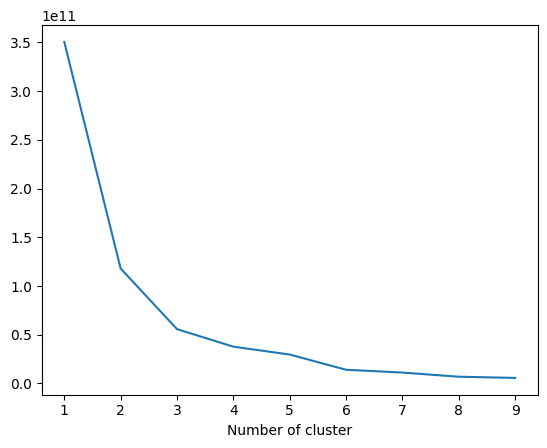

In [669]:
sse={} # error
tx_recency = user[['Revenue']].copy()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_ 
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [670]:
kmeans = KMeans(n_clusters=4)
user['RevenueCluster'] = kmeans.fit_predict(user[['Revenue']])

# ordonare castiguri
user = order_cluster('RevenueCluster', 'Revenue',user, True)
user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4193.0,1167.251771,1348.386004,0.00,301.720,641.940,1499.0100,7616.53
1,122.0,14127.689344,7136.064098,7700.23,9111.495,11269.715,16582.6925,37153.85
2,19.0,65622.708421,23851.754000,39916.50,51009.555,58825.830,71918.5800,124914.53
3,5.0,209342.334000,58598.003581,143825.06,168472.500,194550.790,259657.3000,280206.02


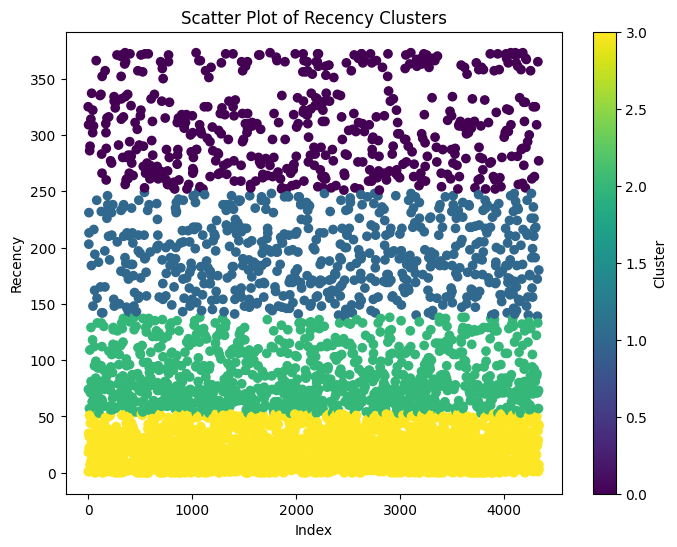

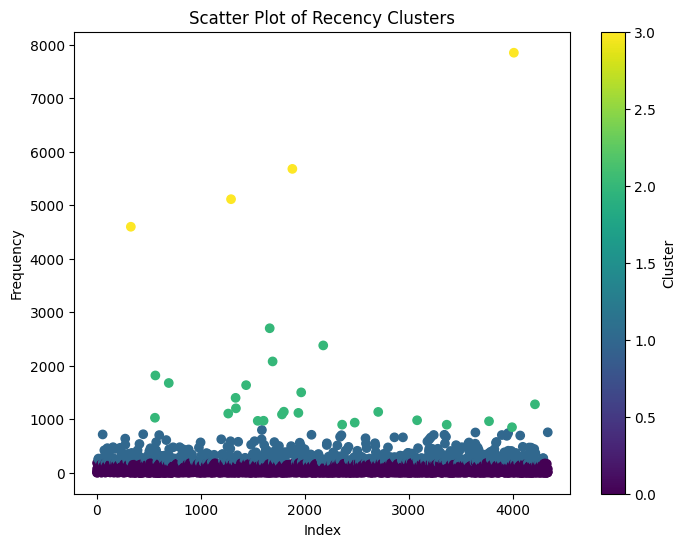

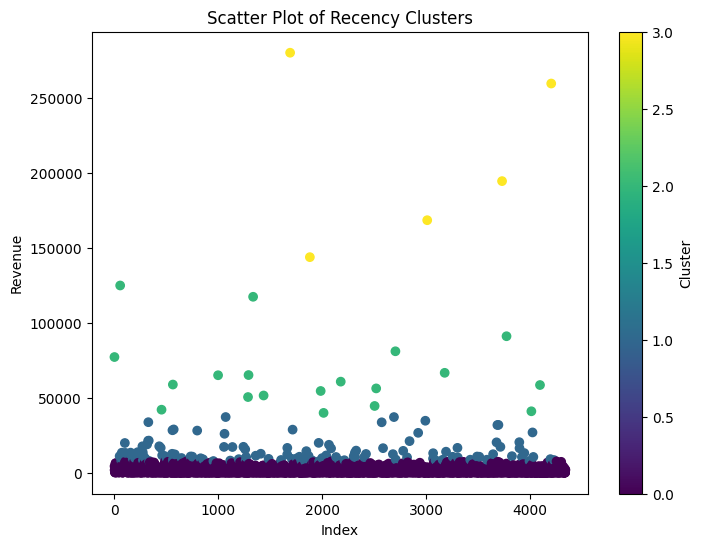

In [671]:
cluster_plot(user, 'Recency', 'RecencyCluster')
cluster_plot(user, 'Frequency', 'FrequencyCluster')
cluster_plot(user, 'Revenue', 'RevenueCluster')

In [672]:
# Pe baza la toate clusterele putem calcula scorul total
user['OverallScore'] = user['RecencyCluster'] + user['FrequencyCluster'] + user['RevenueCluster']

In [673]:
user.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,307.894523,22.480730,380.350467
1,193.369932,32.741554,577.911454
2,85.780208,45.187500,991.428044
3,23.464742,68.308717,1311.053093
4,13.790451,298.196286,4416.382202
5,10.000000,454.920455,14574.151136
6,6.937500,895.312500,45225.894375
7,3.375000,1695.125000,108436.357500
8,1.666667,5012.666667,128787.460000


### Se observa ca Scorul 8-9 este cel mai bun tip de client!

In [674]:
user['Segment'] = 'Low-Value'
user.loc[user['OverallScore']>2,'Segment'] = 'Mid-Value' 
user.loc[user['OverallScore']>4,'Segment'] = 'High-Value' 

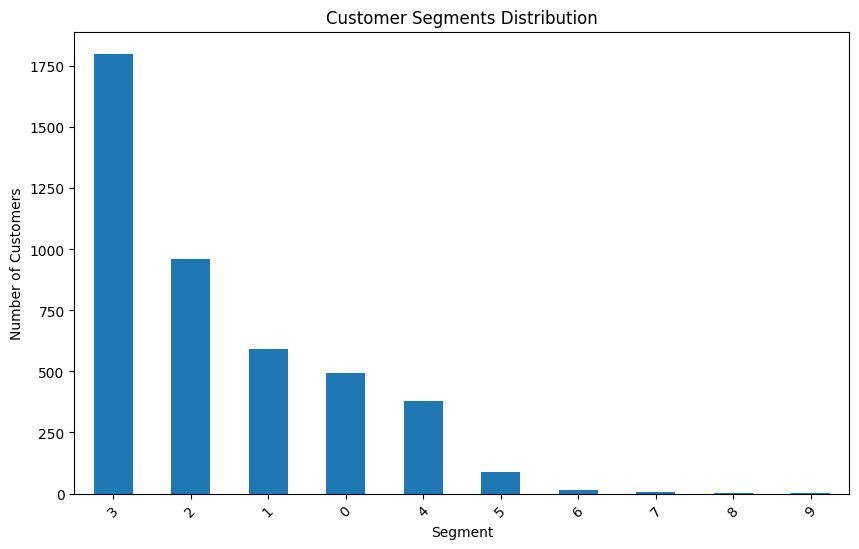

In [685]:
segment_counts = user['OverallScore'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

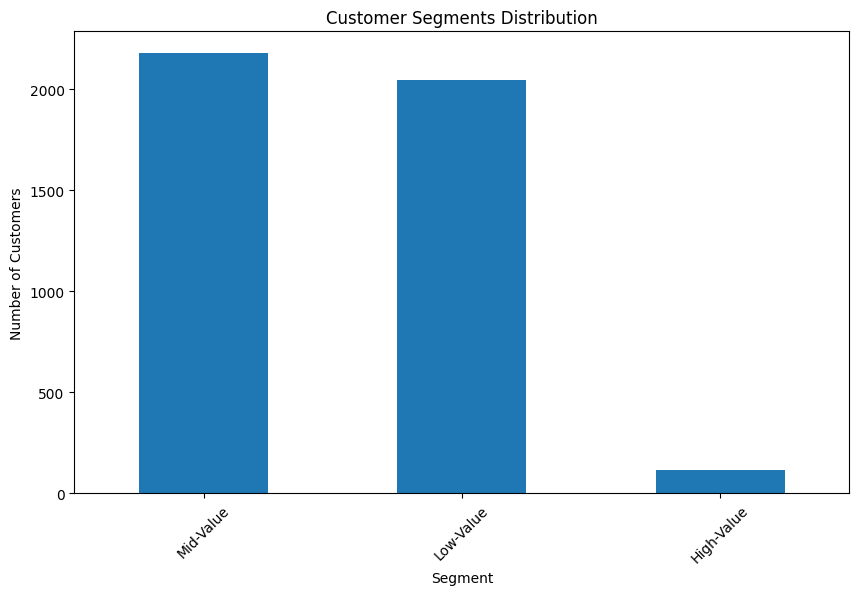

In [686]:
segment_counts = user['Segment'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [675]:
tx_3m = df[(df.InvoiceDate.dt.date < date(2011,6,1)) & (df.InvoiceDate.dt.date >= date(2011,3,1))].reset_index(drop=True) #3 months time
tx_6m = df[(df.InvoiceDate.dt.date >= date(2011,6,1)) & (df.InvoiceDate.dt.date < date(2011,12,1))].reset_index(drop=True) # 6 months time

In [676]:
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_user_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID','m6_Revenue']

In [677]:
tx_merge = pd.merge(user, tx_user_6m, on='CustomerID', how='left') # doar pentru cei care au cumparat in ultimele 6 luni

In [678]:
tx_merge = tx_merge.fillna(0)

In [679]:
# Scoatem outlierii
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]

In [680]:
tx_merge[tx_merge['Segment'] == 'High-Value'].sort_values('m6_Revenue', ascending=False).head(5)

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment,m6_Revenue
324,12744,51,222,21279.29,3,1,1,5,High-Value,11016.64
314,12731,23,274,18895.91,3,1,1,5,High-Value,10665.82
2084,15189,0,212,16225.39,3,1,1,5,High-Value,10109.28
3713,17428,0,328,17256.85,3,1,1,5,High-Value,9552.43
3897,17677,1,304,16363.23,3,1,1,5,High-Value,9396.14


In [634]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
tx_merge['LTVCluster'] = kmeans.fit_predict(tx_merge[['m6_Revenue']])

tx_merge.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,12346,325,1,77183.60,0,0,2,2,Low-Value,0.00,2
1,12347,1,182,4310.00,3,0,0,3,Mid-Value,2261.75,0
2,12348,74,31,1797.24,2,0,0,2,Low-Value,310.00,2
3,12349,18,73,1757.55,3,0,0,3,Mid-Value,1757.55,0
4,12350,309,17,334.40,0,0,0,0,Low-Value,0.00,2


In [635]:
#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,3402.0,338.692391,321.181428,0.00,0.0000,275.240,541.5125,1166.77
1,763.0,2000.303290,707.176169,1169.60,1431.3750,1773.910,2405.1100,3894.92
2,130.0,5836.452154,1680.951232,3926.43,4408.8925,5435.395,6785.1350,11016.64


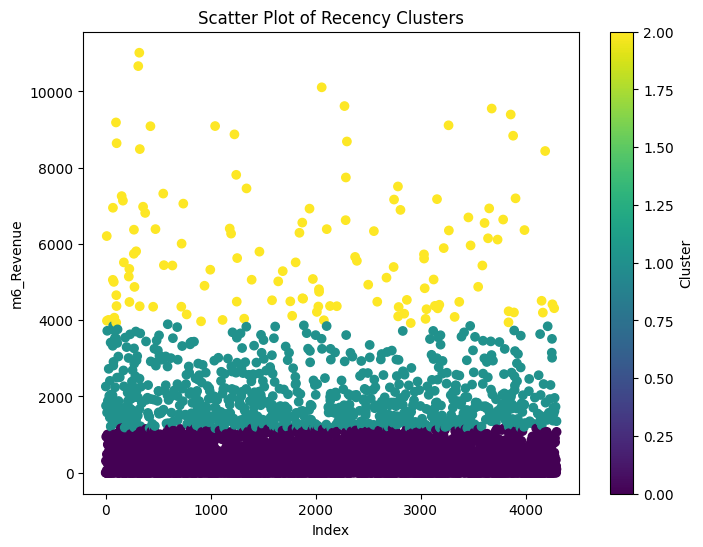

In [636]:
cluster_plot(tx_cluster, 'm6_Revenue', 'LTVCluster')

In [637]:
#convert categorical columns to numerical
tx_class = pd.get_dummies(tx_cluster) #There is only one categorical variable segment
tx_class.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,12346,325,1,77183.60,0,0,2,2,0.00,0,False,True,False
1,12347,1,182,4310.00,3,0,0,3,2261.75,1,False,False,True
2,12348,74,31,1797.24,2,0,0,2,310.00,0,False,True,False
3,12349,18,73,1757.55,3,0,0,3,1757.55,1,False,False,True
4,12350,309,17,334.40,0,0,0,0,0.00,0,False,True,False


In [638]:
#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.875303
Frequency             0.567826
FrequencyCluster      0.520632
OverallScore          0.484928
Revenue               0.461101
RevenueCluster        0.442061
Segment_High-Value    0.419997
RecencyCluster        0.328328
Segment_Mid-Value     0.239470
CustomerID           -0.059155
Recency              -0.321375
Segment_Low-Value    -0.353635
Name: LTVCluster, dtype: float64

In [639]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb

In [640]:
#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [641]:
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,n_jobs=-1).fit(X_train, y_train) #decision trees

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)

Accuracy of XGB classifier on training set: 0.96
Accuracy of XGB classifier on test set: 0.88


In [642]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       164
           1       0.69      0.68      0.68        40
           2       0.70      0.64      0.67        11

    accuracy                           0.88       215
   macro avg       0.78      0.75      0.77       215
weighted avg       0.88      0.88      0.88       215

